### Problem statement

Create a graph function that takes any dataset and create a boxplot and a histogram for numerical variables and a barplot for categorical variables and save them as PNG files in a specified repository. If no repository is specified then by default the graphs get stored in the working directory. The functions also give an additional argument to the user to choose a list of columns. If no list of columns is given the default setting must choose all the columns of the dataset.


**graphs(data, columns, directory)**

* data: the data frame of interest
* columns: the columns of interest (default: the list of all the columns)
* directory: a link to a location in the system (default: the current working directory)

In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
# Reading the file 
iris = pd.read_csv("iris.csv")
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
87,6.3,2.3,4.4,1.3,versicolor
128,6.4,2.8,5.6,2.1,virginica
14,5.8,4.0,1.2,0.2,setosa
136,6.3,3.4,5.6,2.4,virginica
57,4.9,2.4,3.3,1.0,versicolor


##### Data exploration by plotting graphs

In [122]:
# defining a function with arguments data, columns and directory with default path
def graphs(data,cols=None,directory=os.getcwd()):

    if cols == None:                             # If columns are not called in cols argument data is taken with variable
        data1 = data
    else:                                        # if list of columns is passed then this condition works
        diction = {}                             # Empty dictionary is taken as variable "diction"
        for i in range(0,len(cols)):             # using for loop to append columns into dictionary
            diction[cols[i]] = data[cols[i]]
            
        data1 = pd.DataFrame(diction)            # converting dictionary into pandas dataframe and assigned to variable "data1"
        
    num = data1.select_dtypes(include = [np.number])       # numerical columns are divided from datafame and stored in "num"
    cat = data1.select_dtypes(exclude = [np.number])       # categorical columns are divided from datafame and stored in "cat"

    # using for loop to get the barplots for categorical columns
    for j in range(0,len(cat.columns)):
        cat_column = cat.columns[j]                                 # each column for every iteration assigned to variable
        cat[cat_column].value_counts().plot(kind = "barh",           # plotting bar plot with necessary parameters
                                    figsize = (7,5),                # plot dimension (6 X 4)
                                    color = "coral",
                                    grid = False,                   # Disabling grid by using boolean value
                                    edgecolor = "Black",
                                    fontsize = 13)

        plt.xlabel(cat_column,fontsize = 12)                        # assigning name to x-axis with required fontsize
        plt.ylabel("Frequency",fontsize = 12)                       # frequency of discrete variables of the column
        plt.title("Barplot of " + cat_column)                       # assigning title to the barplot
        plt.savefig(directory +'//' + cat_column + ".png")          # saving the plot in the given directory

    # using for loop to get the boxplots and histogram for numerical columns
    for i in range(0,len(num.columns)):                             
        num_column = num.columns[i]                                 # each column for every iteration assigned to variable
        
        # using subplots function with rows = 2, columns = 1, subplots share the same x-axis
        fig, ax = plt.subplots(nrows = 2, ncols = 1,sharex = False,figsize = (8,7)) 
        
        # ax is short for axes, plotting boxplot in the first row with the necessary parameters to plot
        ax[0].boxplot(num[num_column],vert = False,notch = True,
                    patch_artist = True,whiskerprops=dict(color="red"),
                    boxprops=dict(facecolor="lightblue", color="black"))
        
        ax[0].set_xlabel(num_column,fontsize = 12)                   # assigning name to x-axis with required fontsize
        ax[0].set_title("Boxplot of " + num_column,fontsize = 15)    # assigning title to the barplot
        ax[0].set_yticklabels([])                                    # removing ticks and tick lables on y-axis
        ax[0].set_yticks([])


        # plotting histogram to numeric columns
        ax[1].hist(num[num_column],edgecolor = "black",color = "lightblue") 
        ax[1].set_ylabel("Frequency",fontsize = 12)                  # frequency of discrete variables of the column
        ax[1].set_xlabel(num_column,fontsize = 12)                   # assigning name to x-axis with required fontsize
        ax[1].set_title("Histogram of " + num_column,fontsize = 15)  # assigning title to the barplot
        plt.tight_layout(pad = 2.)                                   # maintains gap between 2 plots of same column
        plt.savefig(directory +'//' + num_column + ".png")           # saving the plot in the given directory

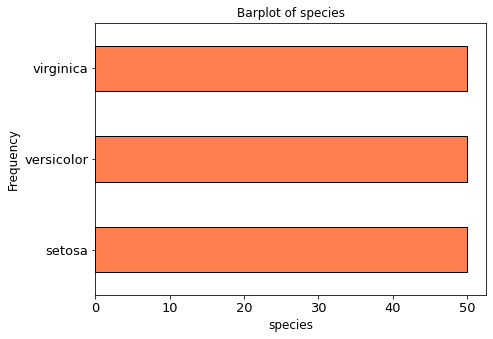

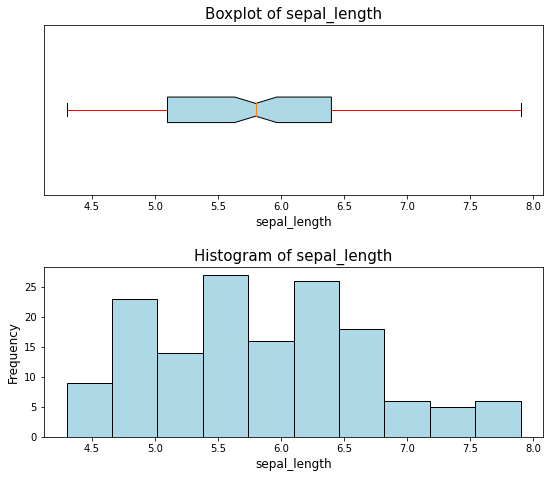

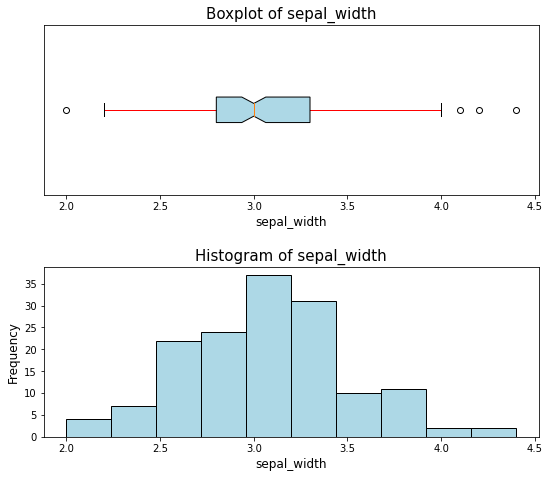

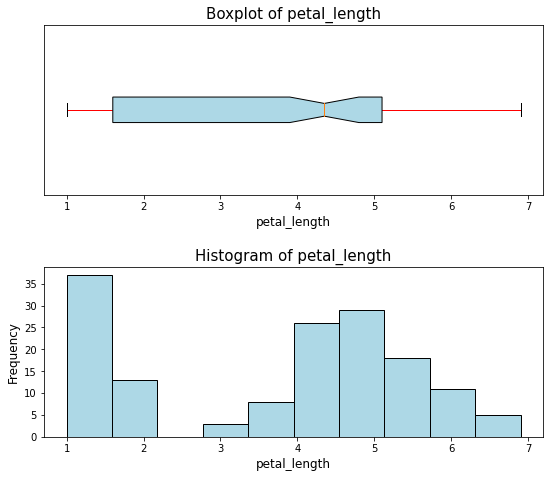

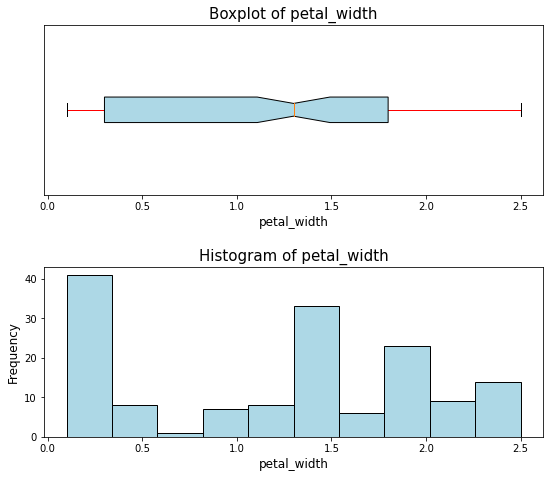

In [123]:
graphs(iris,directory = "C:\\Users\\preet\\Desktop\\images")

In [117]:
# graphs(iris)

In [75]:
# graphs(iris,["sepal_width","species"])

In [10]:
# graphs(iris,["sepal_width","species"],directory = "C:\\Users\\preet\\Desktop\\images")

### Explanation

#### 

### Problem Statement

**Create a graph function that takes any dataset and create a boxplot and a histogram for numerical variables and a barplot for categorical variables and save them as PNG files in a specified repository. If no repository is specified then by default the graphs get stored in the working directory. The functions also give an additional argument to the user to choose a list of columns. If no list of columns is given the default setting must choose all the columns of the dataset.**

* Here in this we are separately plotting barplot for categorical columns and boxplots, histogram for numerical columns.
* Earlier we have to plot the all plots manually by picking each column, it takes much effort.
* With this code effort will be so less compared to manually executing.
* Each plot will be saved in the directory.

##### Function call arguments
##### graphs(data,cols,directory)

#### graphs is the function name with arguments below
* data - It is a dataset which is a dataframe of interest
* cols - calling the specific columns in a list
* directory - path has to be mentioned by user else working directory is used

##### Code structure

**Our main theme is to get the plots for dataset and saving the plots in the given directory.**


* Starting with the given arguments
    * **data** - As metioned as above, dataset is given by the user will be in pandas dataframe.
    * **cols** - it is short for columns, if user wants to plot the specific columns from the given data then user can give the columns of the data in a list .
    * **directory** - this parameter is also an optional, it is basically for saving the plots in a given directory but if choose to save in the working directory then by default plots will be saved in the working directory.


* if else conditional statement is used to convert the cols list into dataframe by following steps.
    * If cols parameter is not given by the user then it takes the data.
    * Else the columns which are given in a list are appended into dictionary and then converting into dataframe.


* After dataframe is assigned , it separates the categorical columns and numerical columns using a syntax dtypes(datatypes) by using include and exclude. Then these are assigned to variables **cat** and **num**.


* Coming to the main structure, code plots the **barplots** for categorical columns and **boxplots**, **histogram** for the numerical columns using for loops.
    * In the first for loop, categorical columns are taken. Using barplot syntax with required parameters code plots the all barplots.
    * In the second, boxplots and histogram are plotted by using subplot function by sharing the axes.
    * Histogram is plotted under the boxplot of the same variable(column name) to compare the data. 
    
    
* Plots are saved in the format **.png** with respect to its column names after every iteration of two for loops.

##### Expected output

1. Output has to be plots of categorical and numerical columns of the data user is taken and those figures are saved in the  working directory by default or these figures will be saved in the user mentioned directory if he calls the directory as below.
      ##### graphs(iris,directory = "C:\\Users\\preet\\Desktop\\images")
      


2. If the user wants to save the plots only of the dataset then function called as
      ##### graphs(iris)



3. User can call the function if he wants the specific columns of the dataset to plot then,
      ##### graphs(iris,["sepal_width","species"])



4. If user wants to save the figures of specific columns in user wanted directory then,
      ##### graphs(iris,["sepal_width","species"],directory = "C:\\Users\\preet\\Desktop\\images")

